In [74]:
import sys
sys.path.append("../../")
import helper

from statsmodels.formula.api import ols
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame, merge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.unicode_minus'] = False

## 연습문제1
아래 각 문제의 데이터를
1. `다항선형 회귀분석으로 재현`하고 `설명력`과 `에러율`을 표시하라 (표준화 적용하지 않아도 됨)
2. 또한 `훈련데이터와 검증데이터`에 대한 `관측치`와 `예측치`에 대한 `시각화`를 제시하라

### 문제 1) 콩의 수분 함유량에 따른 강도를 조사한 데이터 분석
> https://data.hossam.kr/E04/beans.xlsx
- 독립변수 : 수분 함유량
- 종속변수 : 강도

In [36]:
origin1 = read_excel('https://data.hossam.kr/E04/beans.xlsx')
origin1

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


회귀 분석 수행 결과:
	계수:  [[-8.95732508  0.12757362]]
	절편:  [187.1535559]
	훈련데이터 설명력:  0.9448979471844701
	검증데이터 설명력:  -21.739599587577203
	회귀식 추정:  y = -8.957325 x 수분함유량 + 0.127574 x 수분함유량^2 + 187.153556
회귀선의 설명력 및 예측값의 에러율: 
	훈련 데이터 회귀선의 설명력:  0.9448979471844701
	검증 데이터 회귀선의 설명력:  -21.739599587577203
	훈련 데이터 MAE:  0.7162543796946262
	검증 데이터 MAE:  5.869247805758373
	훈련 데이터 MSE:  0.643232126744554
	검증 데이터 MSE:  80.85190964471896
	훈련 데이터 RMSE:  0.8020175351852066
	검증 데이터 RMSE:  8.991768994181232
	훈련 데이터 MAPE:  10.112398453415764
	검증 데이터 MAPE:  21.80860888834842
	훈련 데이터 MPE:  -0.9890505145329316
	검증 데이터 MPE:  -21.80860888834842


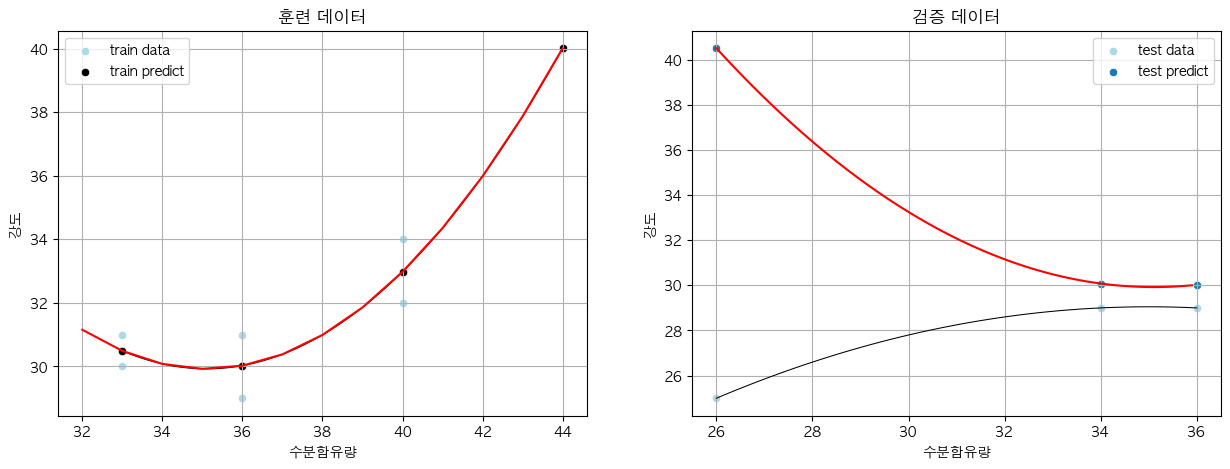

In [37]:
# 다항선형 회귀분석 재현
my_poly = PolynomialFeatures(include_bias = False)
my_fit = my_poly.fit_transform(origin1[['수분함유량']])

x = DataFrame(my_fit, columns = my_poly.get_feature_names_out())
y = origin1[['강도']]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 777)

# 회귀 분석 수행
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)
print('회귀 분석 수행 결과:')
print('\t계수: ', my_fit.coef_)
print('\t절편: ', my_fit.intercept_)
print('\t훈련데이터 설명력: ', my_fit.score(x_train, y_train))
print('\t검증데이터 설명력: ', my_fit.score(x_test, y_test))

# 회귀식 추정
expr_coefs = []
for i, v in enumerate(x.columns):
    expr_coefs.append('%f x %s' % (my_fit.coef_[0][i], v))
expr_coefs_added = ' + '.join(expr_coefs)
expr_final = 'y = ' + expr_coefs_added + ' + %f' % my_fit.intercept_[0]
print('\t회귀식 추정: ', expr_final)

# 예측값 생성 - 훈련데이터, 검증데이터
y_train_pred = my_fit.predict(x_train).reshape(-1)
y_train_pred
y_test_pred = my_fit.predict(x_test).reshape(-1)
y_test_pred

# 회귀선의 설명력 및 예측값의 에러율
print('회귀선의 설명력 및 예측값의 에러율: ')
print('\t훈련 데이터 회귀선의 설명력: ', r2_score(y_train, y_train_pred))
print('\t검증 데이터 회귀선의 설명력: ', r2_score(y_test, y_test_pred))
print('\t훈련 데이터 MAE: ', mean_absolute_error(y_train, y_train_pred))
print('\t검증 데이터 MAE: ', mean_absolute_error(y_test, y_test_pred))
print('\t훈련 데이터 MSE: ', mean_squared_error(y_train, y_train_pred))
print('\t검증 데이터 MSE: ', mean_squared_error(y_test, y_test_pred))
print('\t훈련 데이터 RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('\t검증 데이터 RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('\t훈련 데이터 MAPE: ', np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)
print('\t검증 데이터 MAPE: ', np.mean(np.abs((y_test.values - y_test_pred) / y_test.values)) * 100)
print('\t훈련 데이터 MPE: ', np.mean((y_train.values - y_train_pred)/y_train.values)*100)
print('\t검증 데이터 MPE: ', np.mean((y_test.values - y_test_pred) / y_test.values) * 100)

# 훈련데이터와 검증데이터에 대한 관측치와 예측치에 대한 시각화

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# 훈련 데이터 시각화
sb.scatterplot(x = x_train['수분함유량'],
               y = y_train['강도'],
               label = 'train data',
               color = 'lightblue',
               ax = ax1)
# 훈련 데이터 추세선
coeff = np.polyfit(x_train['수분함유량'], y_train['강도'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
Vtrand = np.linspace(x_train['수분함유량'].min(), x_train['수분함유량'].max(), 100) # 가상의 x 값
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
sb.lineplot(x=Vtrand, y=Ttrand, color = 'black', size = 10, ax=ax1, legend = False)

# 예측값 시각화
sb.scatterplot(x = x_train['수분함유량'],
               y = y_train_pred,
               label = 'train predict',
               color = 'black',
               ax = ax1)
# 추정치 추세선
# # 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax1.get_xlim()     
xrange = np.arange(xmin.round(), xmax.round(), 1)
# # y값에 대한 추정치 계산
y_pred =  xrange**2 * my_fit.coef_[0][1] + xrange * my_fit.coef_[0][0] + my_fit.intercept_[0]
sb.lineplot(x=xrange, y = y_pred, color = 'red', ax=ax1)
ax1.set_title('훈련 데이터')
ax1.legend()
ax1.grid()

# 검증 데이터 시각화
sb.scatterplot(x=x_test['수분함유량'],
               y=y_test['강도'],
               label='test data',
               color = 'lightblue',
               ax = ax2)
# 검증 데이터 추세선
coeff = np.polyfit(x_test['수분함유량'], y_test['강도'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
Vtrand = np.linspace(x_test['수분함유량'].min(), x_test['수분함유량'].max(), 100) # 가상의 x 값
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
sb.lineplot(x=Vtrand, y=Ttrand, color = 'black', size = 10, ax=ax2, legend=False)

# 예측값 시각화
sb.scatterplot(x=x_test['수분함유량'],
               y = y_test_pred,
               label = 'test predict',
               ax = ax2)
# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 0.1)
# y값에 대한 추정치 계산
y_pred = xrange**2 * my_fit.coef_[0][1] + xrange * my_fit.coef_[0][0] + my_fit.intercept_[0]
# 추세선
sb.lineplot(x=xrange, y=y_pred, color = 'red', ax=ax2)

ax2.set_title('검증 데이터')
ax2.legend()
ax2.grid()

plt.show()
plt.close()

In [38]:
# 분석 모델을 위한 학습모델 구성
my_model = ols('강도 ~ 수분함유량', data = origin1)
my_model
# 분석 수행
my_fit = my_model.fit()
my_fit

my_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           0.000599
Time:                        14:21:08   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.276      -5.355      16.353
수분함유량          0.7123      0.130      5.463      0.001       0.412       1.013
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.530
Skew:                           0.264   Prob(JB):                        0.767
Kurtosis:                       2.004   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> MAPE값과 MPE 값이 다르다. 강사님께 물어보기
>
> 

### 문제 2) 아래의 데이터는 10년간 에어컨의 예약대수에 따른 실 판매대수를 조사한 가상의 데이터이다.
> https://data.hossam.kr/E04/aircon.xlsx
- 독립변수 : 10년간 에어컨의 예약대수
- 종속변수 : 실 판매대수

+ 기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.

In [39]:
origin2 = read_excel('https://data.hossam.kr/E04/aircon.xlsx')
origin2

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50
5,38,69
6,39,70
7,46,64
8,49,89
9,58,98


회귀 분석 수행 결과:
	계수:  [[-0.55406606  0.02353277]]
	절편:  [49.22368145]
	훈련데이터 설명력:  0.8790272953308502
	검증데이터 설명력:  0.7716958531520964
	회귀식 추정:  y = -0.554066 x 예약대수 + 0.023533 x 예약대수^2 + 49.223681
회귀선의 설명력 및 예측값의 에러율: 
	훈련 데이터 회귀선의 설명력:  0.8790272953308502
	검증 데이터 회귀선의 설명력:  0.7716958531520964
	훈련 데이터 MAE:  4.931426347359585
	검증 데이터 MAE:  11.78041691384871
	훈련 데이터 MSE:  31.206020143225583
	검증 데이터 MSE:  141.70077381026547
	훈련 데이터 RMSE:  5.586234880778428
	검증 데이터 RMSE:  11.903813414627495
	훈련 데이터 MAPE:  25.804428897039983
	검증 데이터 MAPE:  53.08439934134002
	훈련 데이터 MPE:  -5.500456593462586
	검증 데이터 MPE:  -30.48626932932617


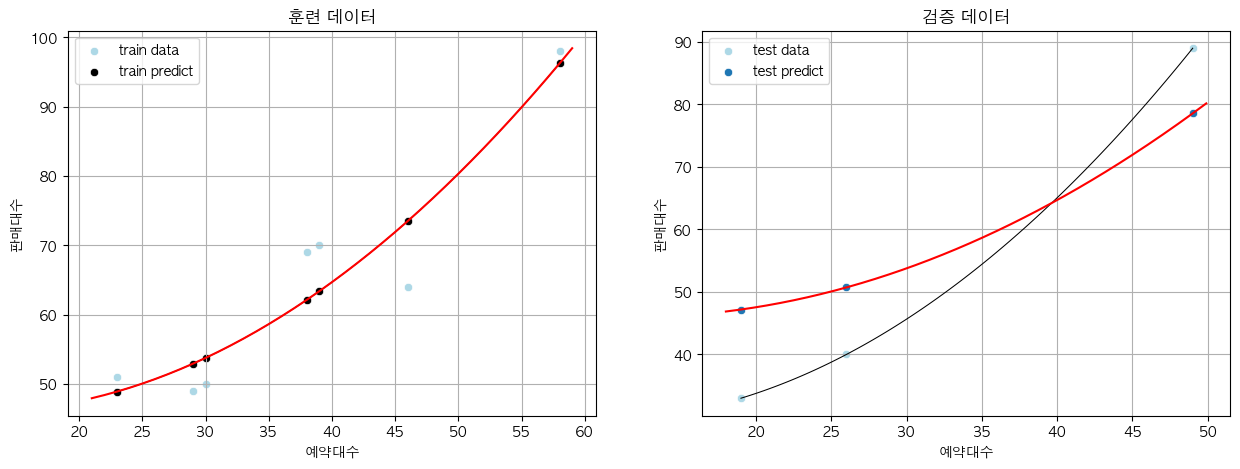

예측 결과:
	에어컨의 예약대수가 150대일 때 판매대수는 495.6대 정도 판매될 것으로 예상됩니다.




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
# 다항선형 회귀분석 재현
my_poly = PolynomialFeatures(include_bias = False)
my_fit = my_poly.fit_transform(origin2[['예약대수']])
my_fit

x = DataFrame(my_fit, columns = my_poly.get_feature_names_out())
y = origin2[['판매대수']]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 777)

# 회귀 분석 수행
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)
print('회귀 분석 수행 결과:')
print('\t계수: ', my_fit.coef_)
print('\t절편: ', my_fit.intercept_)
print('\t훈련데이터 설명력: ', my_fit.score(x_train, y_train))
print('\t검증데이터 설명력: ', my_fit.score(x_test, y_test))

# 회귀식 추정
expr_coefs = []
for i, v in enumerate(x.columns):
    expr_coefs.append('%f x %s' % (my_fit.coef_[0][i], v))
expr_coefs_added = ' + '.join(expr_coefs)
expr_final = 'y = ' + expr_coefs_added + ' + %f' % my_fit.intercept_[0]
print('\t회귀식 추정: ', expr_final)

# 예측값 생성 - 훈련데이터, 검증데이터
y_train_pred = my_fit.predict(x_train).reshape(-1)
y_train_pred
y_test_pred = my_fit.predict(x_test).reshape(-1)
y_test_pred

# 회귀선의 설명력 및 예측값의 에러율
print('회귀선의 설명력 및 예측값의 에러율: ')
print('\t훈련 데이터 회귀선의 설명력: ', r2_score(y_train, y_train_pred))
print('\t검증 데이터 회귀선의 설명력: ', r2_score(y_test, y_test_pred))
print('\t훈련 데이터 MAE: ', mean_absolute_error(y_train, y_train_pred))
print('\t검증 데이터 MAE: ', mean_absolute_error(y_test, y_test_pred))
print('\t훈련 데이터 MSE: ', mean_squared_error(y_train, y_train_pred))
print('\t검증 데이터 MSE: ', mean_squared_error(y_test, y_test_pred))
print('\t훈련 데이터 RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('\t검증 데이터 RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('\t훈련 데이터 MAPE: ', np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)
print('\t검증 데이터 MAPE: ', np.mean(np.abs((y_test.values - y_test_pred) / y_test.values)) * 100)
print('\t훈련 데이터 MPE: ', np.mean((y_train.values - y_train_pred)/y_train.values)*100)
print('\t검증 데이터 MPE: ', np.mean((y_test.values - y_test_pred) / y_test.values) * 100)

# 훈련데이터와 검증데이터에 대한 관측치와 예측치에 대한 시각화

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# 훈련 데이터 시각화
sb.scatterplot(x = x_train['예약대수'],
               y = y_train['판매대수'],
               label = 'train data',
               color = 'lightblue',
               ax = ax1)
# 훈련 데이터 추세선
coeff = np.polyfit(x_train['예약대수'], y_train['판매대수'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
Vtrand = np.linspace(x_train['예약대수'].min(), x_train['예약대수'].max(), 100) # 가상의 x 값
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
sb.lineplot(x=Vtrand, y=Ttrand, color = 'black', size = 10, ax=ax1, legend = False)

# 예측값 시각화
sb.scatterplot(x = x_train['예약대수'],
               y = y_train_pred,
               label = 'train predict',
               color = 'black',
               ax = ax1)
# 추정치 추세선
# # 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax1.get_xlim()     
xrange = np.arange(xmin.round(), xmax.round(), 1)
# # y값에 대한 추정치 계산
y_pred =  xrange**2 * my_fit.coef_[0][1] + xrange * my_fit.coef_[0][0] + my_fit.intercept_[0]
sb.lineplot(x=xrange, y = y_pred, color = 'red', ax=ax1)
ax1.set_title('훈련 데이터')
ax1.legend()
ax1.grid()

# 검증 데이터 시각화
sb.scatterplot(x=x_test['예약대수'],
               y=y_test['판매대수'],
               label='test data',
               color = 'lightblue',
               ax = ax2)
# 검증 데이터 추세선
coeff = np.polyfit(x_test['예약대수'], y_test['판매대수'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
Vtrand = np.linspace(x_test['예약대수'].min(), x_test['예약대수'].max(), 100) # 가상의 x 값
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
sb.lineplot(x=Vtrand, y=Ttrand, color = 'black', size = 10, ax=ax2, legend=False)

# 예측값 시각화
sb.scatterplot(x=x_test['예약대수'],
               y = y_test_pred,
               label = 'test predict',
               ax = ax2)
# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 0.1)
# y값에 대한 추정치 계산
y_pred = xrange**2 * my_fit.coef_[0][1] + xrange * my_fit.coef_[0][0] + my_fit.intercept_[0]
# 추세선
sb.lineplot(x=xrange, y=y_pred, color = 'red', ax=ax2)

ax2.set_title('검증 데이터')
ax2.legend()
ax2.grid()

plt.show()
plt.close()

# 예측
y_train_pred = my_fit.predict([[150, 150**2]]).reshape(-1)
y_train_pred
print('예측 결과:')
print('\t에어컨의 예약대수가 150대일 때 판매대수는 {:.1f}대 정도 판매될 것으로 예상됩니다.'.format(y_train_pred[0]))
print('\n')

### 문제 3) 아래의 데이터는 부모의 키에 따른 자식의 키를 조사한 데이터이다.
> https://data.hossam.kr/E04/galton.xlsx
- 독립변수 : 부모의 키
- 종속변수 : 자식의 키

+ 당신이 자식을 낳는다면 키가 어느정도일지 예측해 보시오.

In [41]:
origin3 = read_excel('https://data.hossam.kr/E04/galton.xlsx')
origin3

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


회귀 분석 수행 결과:
	계수:  [[-6.03493121  0.04880873]]
	절편:  [252.40084335]
	훈련데이터 설명력:  0.21339707956726817
	검증데이터 설명력:  0.21340779669600185
	회귀식 추정:  y = -6.034931 x parent + 0.048809 x parent^2 + 252.400843
회귀선의 설명력 및 예측값의 에러율: 
	훈련 데이터 회귀선의 설명력:  0.21339707956726817
	검증 데이터 회귀선의 설명력:  0.21340779669600185
	훈련 데이터 MAE:  1.776372825429813
	검증 데이터 MAE:  1.8450273891702862
	훈련 데이터 MSE:  4.960943625539211
	검증 데이터 MSE:  5.027910783110966
	훈련 데이터 RMSE:  2.2273175852444598
	검증 데이터 RMSE:  2.242300332941813
	훈련 데이터 MAPE:  3.2713785348075763
	검증 데이터 MAPE:  3.3003013848213727
	훈련 데이터 MPE:  -0.13676333264997603
	검증 데이터 MPE:  -0.016364789261253402


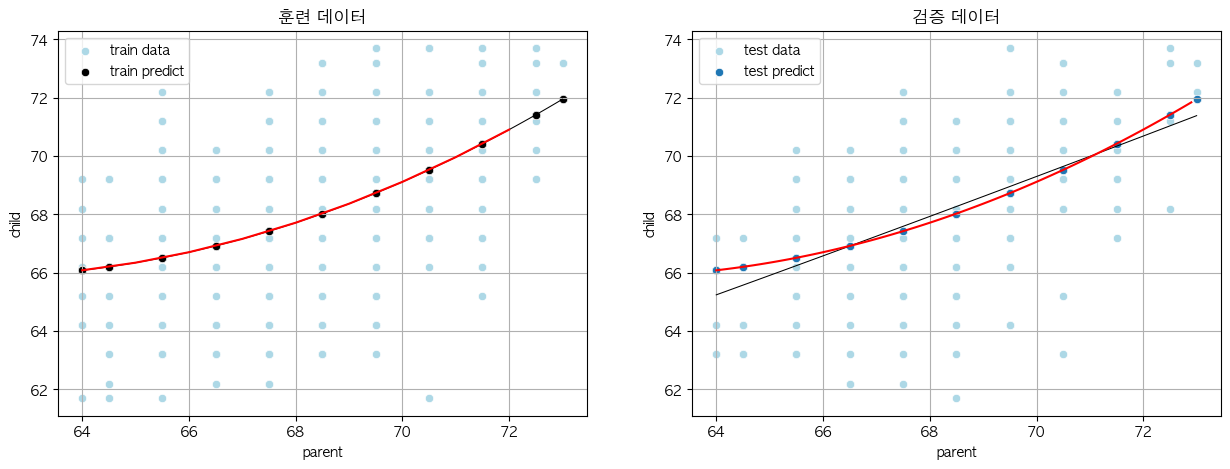

예측 결과:
	키 68.9인 내가 아이를 낳는다면 아이의 키는 68.3inch 정도일 것으로 예상됩니다.




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
# 다항선형 회귀분석 재현
my_poly = PolynomialFeatures(include_bias = False)
my_fit = my_poly.fit_transform(origin3[['parent']])

x = DataFrame(my_fit, columns = my_poly.get_feature_names_out())
y = origin3[['child']]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 777)

# 회귀 분석 수행
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)
print('회귀 분석 수행 결과:')
print('\t계수: ', my_fit.coef_)
print('\t절편: ', my_fit.intercept_)
print('\t훈련데이터 설명력: ', my_fit.score(x_train, y_train))
print('\t검증데이터 설명력: ', my_fit.score(x_test, y_test))

# 회귀식 추정
expr_coefs = []
for i, v in enumerate(x.columns):
    expr_coefs.append('%f x %s' % (my_fit.coef_[0][i], v))
expr_coefs_added = ' + '.join(expr_coefs)
expr_final = 'y = ' + expr_coefs_added + ' + %f' % my_fit.intercept_[0]
print('\t회귀식 추정: ', expr_final)

# 예측값 생성 - 훈련데이터, 검증데이터
y_train_pred = my_fit.predict(x_train).reshape(-1)
y_train_pred
y_test_pred = my_fit.predict(x_test).reshape(-1)
y_test_pred

# 회귀선의 설명력 및 예측값의 에러율
print('회귀선의 설명력 및 예측값의 에러율: ')
print('\t훈련 데이터 회귀선의 설명력: ', r2_score(y_train, y_train_pred))
print('\t검증 데이터 회귀선의 설명력: ', r2_score(y_test, y_test_pred))
print('\t훈련 데이터 MAE: ', mean_absolute_error(y_train, y_train_pred))
print('\t검증 데이터 MAE: ', mean_absolute_error(y_test, y_test_pred))
print('\t훈련 데이터 MSE: ', mean_squared_error(y_train, y_train_pred))
print('\t검증 데이터 MSE: ', mean_squared_error(y_test, y_test_pred))
print('\t훈련 데이터 RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('\t검증 데이터 RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('\t훈련 데이터 MAPE: ', np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)
print('\t검증 데이터 MAPE: ', np.mean(np.abs((y_test.values - y_test_pred) / y_test.values)) * 100)
print('\t훈련 데이터 MPE: ', np.mean((y_train.values - y_train_pred)/y_train.values)*100)
print('\t검증 데이터 MPE: ', np.mean((y_test.values - y_test_pred) / y_test.values) * 100)

# 훈련데이터와 검증데이터에 대한 관측치와 예측치에 대한 시각화

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# 훈련 데이터 시각화
sb.scatterplot(x = x_train['parent'],
               y = y_train['child'],
               label = 'train data',
               color = 'lightblue',
               ax = ax1)
# 훈련 데이터 추세선
coeff = np.polyfit(x_train['parent'], y_train['child'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
Vtrand = np.linspace(x_train['parent'].min(), x_train['parent'].max(), 100) # 가상의 x 값
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
sb.lineplot(x=Vtrand, y=Ttrand, color = 'black', size = 10, ax=ax1, legend = False)

# 예측값 시각화
sb.scatterplot(x = x_train['parent'],
               y = y_train_pred,
               label = 'train predict',
               color = 'black',
               ax = ax1)
# 추정치 추세선
# # 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax1.get_xlim()     
xrange = np.arange(xmin.round(), xmax.round(), 1)
# # y값에 대한 추정치 계산
y_pred =  xrange**2 * my_fit.coef_[0][1] + xrange * my_fit.coef_[0][0] + my_fit.intercept_[0]
sb.lineplot(x=xrange, y = y_pred, color = 'red', ax=ax1)
ax1.set_title('훈련 데이터')
ax1.legend()
ax1.grid()

# 검증 데이터 시각화
sb.scatterplot(x=x_test['parent'],
               y=y_test['child'],
               label='test data',
               color = 'lightblue',
               ax = ax2)
# 검증 데이터 추세선
coeff = np.polyfit(x_test['parent'], y_test['child'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
Vtrand = np.linspace(x_test['parent'].min(), x_test['parent'].max(), 100) # 가상의 x 값
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
sb.lineplot(x=Vtrand, y=Ttrand, color = 'black', size = 10, ax=ax2, legend=False)

# 예측값 시각화
sb.scatterplot(x=x_test['parent'],
               y = y_test_pred,
               label = 'test predict',
               ax = ax2)
# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 0.1)
# y값에 대한 추정치 계산
y_pred = xrange**2 * my_fit.coef_[0][1] + xrange * my_fit.coef_[0][0] + my_fit.intercept_[0]
# 추세선
sb.lineplot(x=xrange, y=y_pred, color = 'red', ax=ax2)

ax2.set_title('검증 데이터')
ax2.legend()
ax2.grid()

plt.show()
plt.close()

# 예측
y_train_pred = my_fit.predict([[68.9, 68.9**2]]).reshape(-1)
y_train_pred
print('예측 결과:')
print('\t키 68.9인 내가 아이를 낳는다면 아이의 키는 {:.1f}inch 정도일 것으로 예상됩니다.'.format(y_train_pred[0]))
print('\n')

## 연습문제2
아래 각 문제의 데이터를
1. `다항 선형 회귀 분석으로 수행`하라
2. 범주형 변수가 있다면 통제요인으로 설정하여 `더미변수로 추가`하라
2. 또한 `훈련데이터와 검증데이터`에 대한 `관측치`와 `예측치`에 대한 `시각화`를 제시하라

### 문제 1) 다음의 데이터는 442명의 당뇨병 환자를 대상으로 검사 결과이다.
> https://data.hossam.kr/E04/diabetes.xlsx

| 변수   | 설명                    |
| ------ | ----------------------- |
| age    | 나이                    |
| sex    | 성별                    |
| bmi    | bmi지수(비만도)         |
| bp     | 평균 혈압               |
| s1~s6  | 6종류의 혈액검사 수치   |
| target | 당뇨병 진행률(종속변수) |

- 주어진 데이터는 표준화가 적용되어 있다
- 더미변수: sex
- 독립변수: age, sex, bmi, bp, s1~s6
- 종속변수: target

In [43]:
origin4 = read_excel('https://data.hossam.kr/E04/diabetes.xlsx')
origin4

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


결측치: 
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


각 피쳐 별 기초통계량 및 종류: 
age
count    4.420000e+02
mean    -7.535450e-19
std      4.761905e-02
min     -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
max      1.107267e-01
Name: age, dtype: float64
age
 0.016281    19
 0.041708    17
 0.009016    16
-0.027310    15
-0.001882    14
-0.052738    14
 0.045341    14
 0.012648    14
 0.067136    13
 0.005383    13
-0.005515    12
 0.030811    12
 0.001751    12
 0.023546    12
 0.048974    11
 0.019913    11
-0.041840    11
-0.009147    11
-0.023677    10
 0.038076    10
 0.034443     9
-0.045472     9
 0.027178     9
-0.074533     8
 0.070769     7
-0.016412     7
-0.020045     7
 0.059871     7
-0.060003     7
-0.049105     7
-0.038207     6
-0.070900     6
 0.063504     6
-0.056370     6
 0.074401     6
-0.034575     6
-0.030942     5
 0.056239     5
 0.081666

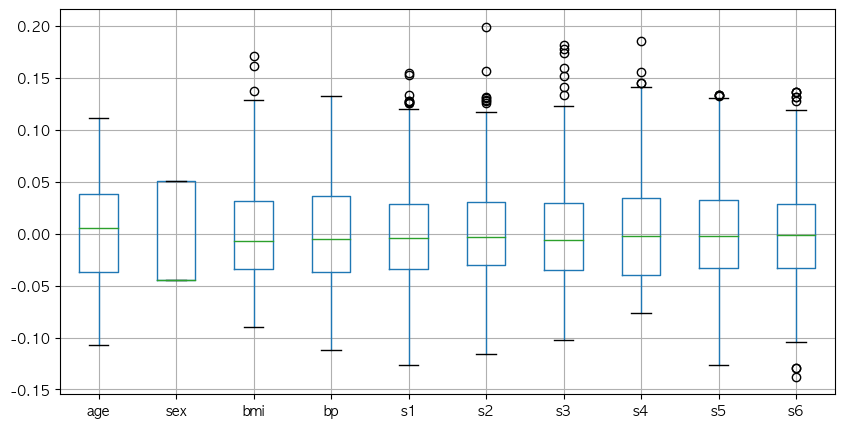

In [44]:
# 결측치, 종류, 기초통계량 확인

print('결측치: ')
print(origin4.isnull().sum())
print('\n')

# 독립변수들만 있는 데이터프레임 생성
origin4_ind_features = origin4.drop('target', axis = 'columns')
print('각 피쳐 별 기초통계량 및 종류: ')
for a in origin4_ind_features.columns:
    print(a)
    print(origin4_ind_features[a].describe())
    print(origin4_ind_features[a].value_counts())
print('기초통계량 시각화: ')
plt.figure()
plt.grid()      # 격자를 표시하고자 하는 경우 반드시 boxplot() 함수보다 먼저 표시해야 함 
origin4_ind_features.boxplot()
plt.show()
plt.close()

In [72]:
# 더미 변수 처리
origin4['sex'] = np.where(origin4['sex']<=0, 0, 1) # 0보다 작거나 같으면 0으로 바꾸고 나머지는 1로 바꿈
origin4['sex'].value_counts()

sex
0    235
1    207
Name: count, dtype: int64

In [79]:
# 다중 선형 회귀
my_model1 = ols('target ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6',
                data = origin4)
my_fit1 = my_model1.fit()
print('다중선형회귀 결과표: ', my_fit1.summary())
print('ols 분석 결과 %s가 당뇨병 진행률에 유의미한 요소들로 분석되었다.' % 'sex, bmi, bp, s5')

# 주성분 분석 (pca)

# 독립변수들만 있는 데이터프레임 재생성
origin4_ind_features = origin4.drop('target', axis = 'columns')
my_model2 = pca(n_components=len(origin4_ind_features.columns))
my_fit2 = my_model2.fit_transform(origin4_ind_features)
my_fit2
topfeat = my_fit2['topfeat']
# 설명력이 높은 필드 추출
best = topfeat.query("type == 'best'")
feature = list(set(list(best['feature'])))
feature
# 회귀 분석 실행
my_ols1 = helper.myOls(origin4, "target", feature)
print(my_ols1.summary)
print(my_ols1.table)
print('주성분 분석 (pca) 결과 %s가 당뇨병 진행률에 유의미한 요소들로 분석되었다.' % 'sex, s1, s4, s5, bmi')

# 결과값과 예측값 비교
result_df = DataFrame({
    'sex':origin4['sex'],
    's5':origin4['s5'],
    "실제 당뇨병 진행률":origin4['target'],
    "예측 당뇨병 진행률":my_ols1.fit.predict(origin4.filter(feature))
})
result_df

다중선형회귀 결과표:                              OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           3.83e-62
Time:                        14:43:42   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.8392      3.756     43

,sex,s5,실제 당뇨병 진행률,예측 당뇨병 진행률
0,1,0.019907,151,205.826036
1,0,-0.068332,75,68.899423
2,1,0.002861,141,186.436859
3,0,0.022688,206,164.975701
4,0,-0.031988,135,110.702427
...,...,...,...,...
437,1,0.031193,178,178.694470
438,1,-0.018114,104,120.631225
439,1,-0.046883,132,117.172871
440,0,0.044529,220,206.974325


회귀 분석 수행 결과:
	계수:  [[ 2.17165759e+15  6.25750000e+02  7.21073684e+01  5.38195794e+02
  -4.40288181e+02  3.77862983e+02 -9.97715125e+01 -2.17165759e+15
  -9.61252043e+01  2.80507518e+01 -4.94698041e+02  3.29353885e+02
   4.88665151e+02  3.83966035e+02 -2.73392772e+03  2.21546015e+03
  -4.88966148e+02  5.00759227e+02  1.09648253e+03  3.52695841e+03
   4.68398276e+02 -2.59338913e+02 -9.42131058e+02  1.83961107e+02
   1.33940920e+03  3.06467009e+03 -5.22817747e+03 -3.50866487e+03
  -3.46483678e+03  2.32666694e+03  1.81294656e+03  4.50002646e+02
   1.88667187e+03 -3.61697512e+02  2.43885451e+03]]
	절편:  [145.51031934]
	훈련 데이터 설명력:  0.5490652928242661
	검증 데이터 설명력:  0.43915373307035577
	회귀식 추정:  y = 2171657588530087.250000 x sex + 625.750000 x s5 + 72.107368 x s6 + 538.195794 x s4 + -440.288181 x s1 + 377.862983 x bmi + -99.771512 x age + -2171657588530104.500000 x sex^2 + -96.125204 x sex s5 + 28.050752 x sex s6 + -494.698041 x sex s4 + 329.353885 x sex s1 + 488.665151 x sex bmi + 383.966035 

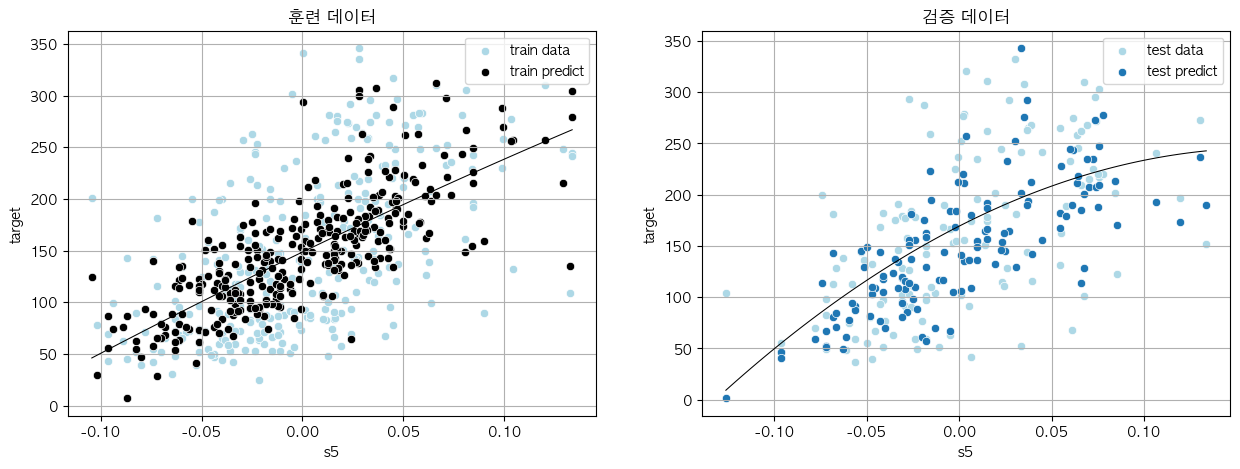

In [89]:
# 다항선형 회귀분석 수행
my_poly = PolynomialFeatures(degree = 2,
                             include_bias = False)
my_fit2 = my_poly.fit_transform(origin4[feature])
my_fit2
# 계수 이름 확인
# my_poly.get_feature_names_out()
# 2차항을 갖고 있는 데이터프레임 생성
x = DataFrame(my_fit2, columns=my_poly.get_feature_names_out())
x.head()
# 훈련 데이터와 검증 데이터로 분리
x_train, x_test, y_train, y_test =  train_test_split(x, origin4[['target']], 
                                                     test_size = 0.3,
                                                     random_state = 777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# 회귀 분석 수행
my_model = LinearRegression()
my_fit3 = my_model.fit(x_train, y_train)
print('회귀 분석 수행 결과:')
print('\t계수: ', my_fit3.coef_)
print('\t절편: ', my_fit3.intercept_)
print('\t훈련 데이터 설명력: ', my_fit3.score(x_train, y_train))
print('\t검증 데이터 설명력: ', my_fit3.score(x_test, y_test))

# 회귀식 추정
expr_coefs = []
for i, v in enumerate(x.columns):
    expr_coefs.append('%f x %s' % (my_fit3.coef_[0][i], v))
expr_coefs_added = ' + '.join(expr_coefs)
expr_final = 'y = ' + expr_coefs_added + ' + %f' % my_fit3.intercept_[0]
print('\t회귀식 추정: ', expr_final)


# 예측값 생성 - 훈련데이터, 검증데이터
y_train_pred = my_fit3.predict(x_train).reshape(-1)
y_train_pred
y_test_pred = my_fit3.predict(x_test).reshape(-1)
y_test_pred

# 훈련데이터와 검증데이터에 대한 관측치와 예측치에 대한 시각화

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# 훈련 데이터 시각화
sb.scatterplot(x = x_train['s5'],
               y = y_train['target'],
               label = 'train data',
               color = 'lightblue',
               ax = ax1)
# 훈련 데이터 추세선
coeff = np.polyfit(x_train['s5'], y_train['target'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
Vtrand = np.linspace(x_train['s5'].min(), x_train['s5'].max(), 100) # 가상의 x 값
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
sb.lineplot(x=Vtrand, y=Ttrand, color = 'black', size = 10, ax=ax1, legend = False)

# 예측값 시각화
sb.scatterplot(x = x_train['s5'],
               y = y_train_pred,
               label = 'train predict',
               color = 'black',
               ax = ax1)
# 추정치 추세선
# # 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax1.get_xlim()     
xrange = np.arange(xmin.round(), xmax.round(), 1)
# # y값에 대한 추정치 계산
y_pred =  xrange**2 * my_fit3.coef_[0][1] + xrange * my_fit3.coef_[0][0] + my_fit3.intercept_[0]
sb.lineplot(x=xrange, y = y_pred, color = 'red', ax=ax1)
ax1.set_title('훈련 데이터')
ax1.legend()
ax1.grid()

# 검증 데이터 시각화
sb.scatterplot(x=x_test['s5'],
               y=y_test['target'],
               label='test data',
               color = 'lightblue',
               ax = ax2)
# 검증 데이터 추세선
coeff = np.polyfit(x_test['s5'], y_test['target'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
Vtrand = np.linspace(x_test['s5'].min(), x_test['s5'].max(), 100) # 가상의 x 값
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
sb.lineplot(x=Vtrand, y=Ttrand, color = 'black', size = 10, ax=ax2, legend=False)

# 예측값 시각화
sb.scatterplot(x=x_test['s5'],
               y = y_test_pred,
               label = 'test predict',
               ax = ax2)
# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 0.1)
# y값에 대한 추정치 계산
y_pred = xrange**2 * my_fit3.coef_[0][1] + xrange * my_fit3.coef_[0][0] + my_fit3.intercept_[0]
# 추세선
sb.lineplot(x=xrange, y=y_pred, color = 'red', ax=ax2)

ax2.set_title('검증 데이터')
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### 문제 2) 다음의 데이터 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.

> https://data.hossam.kr/E04/manhattan.xlsx

- 주어진 데이터는 표준화가 적용되어 있다
- 더미변수 되어있음
- 독립변수: age, sex, bmi, bp, s1~s6
- 종속변수: rent

In [48]:
origin5 = read_excel('https://data.hossam.kr/E04/manhattan.xlsx')
origin5

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


결측치: 없음


각 피쳐 별 기초통계량 및 종류: 
bedrooms
count    3539.000000
mean        1.351936
std         0.967595
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: bedrooms, dtype: float64
bedrooms
1.0    1476
2.0     969
0.0     642
3.0     327
4.0      75
0.5      24
2.5       8
1.5       8
5.0       7
3.5       3
Name: count, dtype: int64
bathrooms
count    3539.000000
mean        1.366770
std         0.599588
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: bathrooms, dtype: float64
bathrooms
1    2420
2     930
3     165
4      13
0       9
5       2
Name: count, dtype: int64
size_sqft
count    3539.000000
mean      939.727324
std       477.949074
min       250.000000
25%       613.000000
50%       800.000000
75%      1141.000000
max      4800.000000
Name: size_sqft, dtype: float64
size_sqft
600     103
800     102
700      98
500      80
650      79
       ... 
1616     

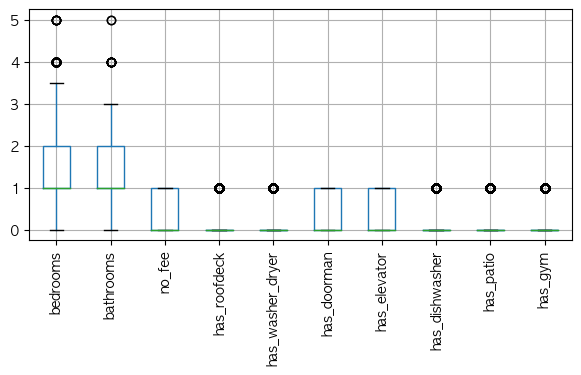

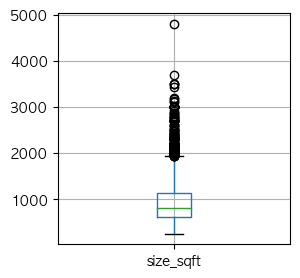

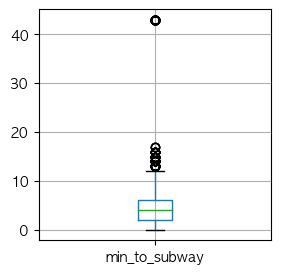

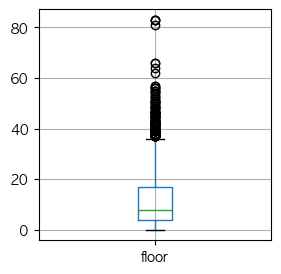

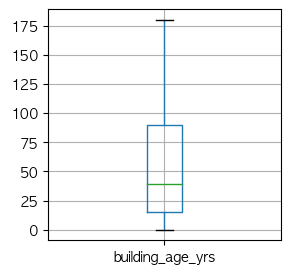

In [91]:
# 결측치, 종류, 기초통계량 확인 (불필요한 변수 또는 명목형 변수들을 찾기 위해)

# 독립변수들만 있는 데이터프레임 생성
origin5_ind_features = origin5.drop('rent', axis = 'columns')

# 기초통계량 박스플롯 확인 후 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs'들을
#  따로 시각화하기로 결정 (값이 다른 피쳐들에 비해 너무 크기에)
big_value_features = ['size_sqft','min_to_subway','floor', 'building_age_yrs']
origin5_ind_features_wo_big_values = origin5_ind_features.drop(big_value_features,
                                                                axis = 'columns')
# 종류 확인 후 독립변수 중 borough 피쳐 제거 결정 (다 manhattan에 삶 - 값의 종류가 1가지밖에 없음)
origin5_ind_features = origin5_ind_features.drop('borough', axis = 'columns')
# 명목형 변수인 neighborhood은 값의 종류가 너무 많으므로 제거 결정
origin5_ind_features = origin5_ind_features.drop('neighborhood', axis = 'columns')

print('결측치: ', end = "")
if origin5.isnull().sum().sum() == 0:
    print('없음')
else:
    print(origin5.isnull().sum())
print('\n')

print('각 피쳐 별 기초통계량 및 종류: ')
for a in origin5_ind_features.columns:
    print(a)
    print(origin5_ind_features[a].describe())
    print(origin5_ind_features[a].value_counts())
print('기초통계량 시각화: ')
plt.rcParams['figure.figsize'] = (7, 3)
plt.figure()
plt.grid()      # 격자를 표시하고자 하는 경우 반드시 boxplot() 함수보다 먼저 표시해야 함 
origin5_ind_features_wo_big_values.boxplot()
plt.xticks(rotation=90)
plt.show()
plt.close()

plt.rcParams['figure.figsize'] = (3, 3)
for a in big_value_features:
    plt.figure()
    plt.grid()      # 격자를 표시하고자 하는 경우 반드시 boxplot() 함수보다 먼저 표시해야 함 
    origin5_ind_features.boxplot([a])
    plt.show()
    plt.close()


In [50]:
origin5_ind_features.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [51]:
# 다항식으로 변환시 더미 변수 제외 및 표준화 실행
dummies = ['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
           'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']
not_dummies = origin5_ind_features.drop(dummies, axis = 'columns')

# 이상치가 많은 것들은 robust scaler, 나머지는 standard scaler 실행
# # robust scaler
robust_features = ['size_sqft', 'min_to_subway', 'floor']
scaler = RobustScaler()
scaler.fit(not_dummies[robust_features])
not_dummies_robust_scaled = scaler.transform(not_dummies[robust_features])
not_dummies_robust_scaled_df = DataFrame(not_dummies_robust_scaled, columns=robust_features).reset_index()
not_dummies_robust_scaled_df
# # standard scaler
standard_features = ['bedrooms', 'bathrooms', 'building_age_yrs']
not_dummies_standard_scaled = StandardScaler().fit_transform(not_dummies[standard_features])
not_dummies_standard_scaled_df = DataFrame(not_dummies_standard_scaled, columns=standard_features).reset_index()
not_dummies_standard_scaled_df

# 표준화 된 데이터프레임 병합
origin5_ind_features_scaled = merge(not_dummies_robust_scaled_df,
                                    not_dummies_standard_scaled_df)
origin5_ind_features_scaled

,index,size_sqft,min_to_subway,floor,bedrooms,bathrooms,building_age_yrs
0,0,-0.606061,1.25,-0.461538,-1.397410,-0.611790,-0.888763
1,1,2.272727,0.00,-0.538462,0.669863,1.056257,1.117593
2,2,0.219697,-0.50,3.307692,-0.363774,-0.611790,-0.584000
3,3,0.331439,-0.25,0.000000,-0.363774,-0.611790,-0.533206
4,4,7.575758,-0.25,-0.307692,0.669863,1.056257,2.133470
...,...,...,...,...,...,...,...
3534,3534,-0.507576,-0.25,0.000000,-0.363774,-0.611790,-0.914160
3535,3535,0.356061,0.25,0.153846,0.669863,1.056257,-1.091938
3536,3536,-1.041667,-0.50,-0.230769,-1.397410,-0.611790,1.117593
3537,3537,-0.282197,0.50,-0.230769,-0.363774,-0.611790,-0.964953


회귀 분석 수행 결과:
	계수:  [[ 4.60018673e-02  2.89599419e+03 -3.59318888e+02  3.63084810e+02
  -2.92814782e+02  3.09855015e+02 -2.75858120e+02 -1.29800224e+02
  -2.13926962e+01  2.50869435e+02 -4.38533100e+01  3.98608261e+02
  -5.07691513e+02  3.04693287e+01 -7.90048016e-01  1.13596427e+01
  -8.63901941e+00 -9.06080285e+01 -1.02793842e+02  1.50083320e+02
  -1.64059542e+02 -2.94194350e+01 -7.95958035e+01 -1.60714772e+01
   9.13931978e+01 -1.08520388e+02  1.87952704e+02  2.12321054e+02
  -2.80151426e+01  5.96267634e+00  8.35040935e+01 -2.55018775e+02
   1.96738297e+02  2.78728713e+01 -3.58871019e+02  1.88045346e+01]]
	절편:  [4084.913849]
	훈련 데이터 설명력:  0.8114758909545473
	검증 데이터 설명력:  0.788569732350321
	회귀식 추정:  y = 0.046002 x size_sqft + 2895.994194 x min_to_subway + -359.318888 x floor + 363.084810 x bedrooms + -292.814782 x bathrooms + 309.855015 x building_age_yrs + -275.858120 x size_sqft^2 + -129.800224 x size_sqft min_to_subway + -21.392696 x size_sqft floor + 250.869435 x size_sqft bedroom

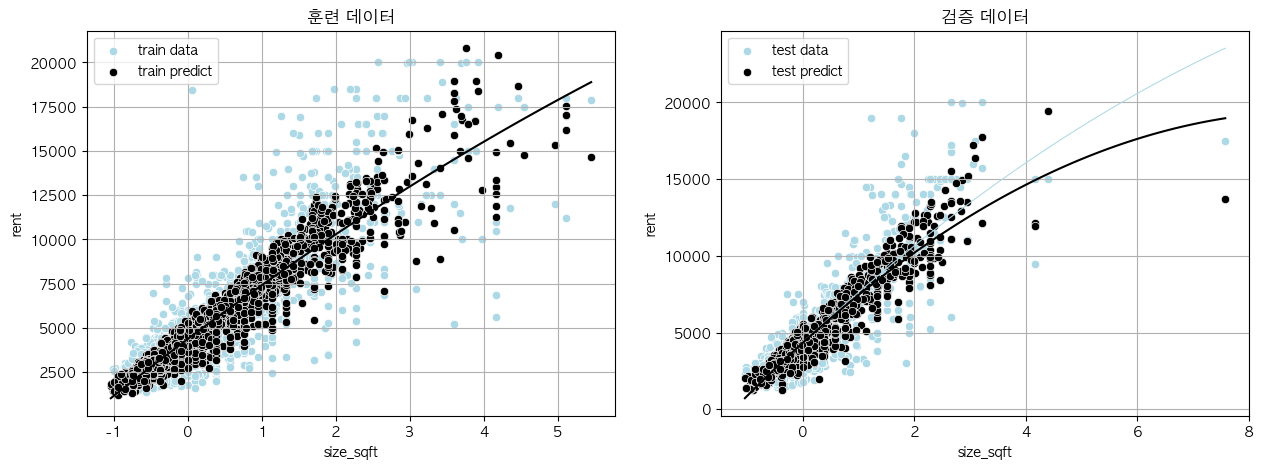

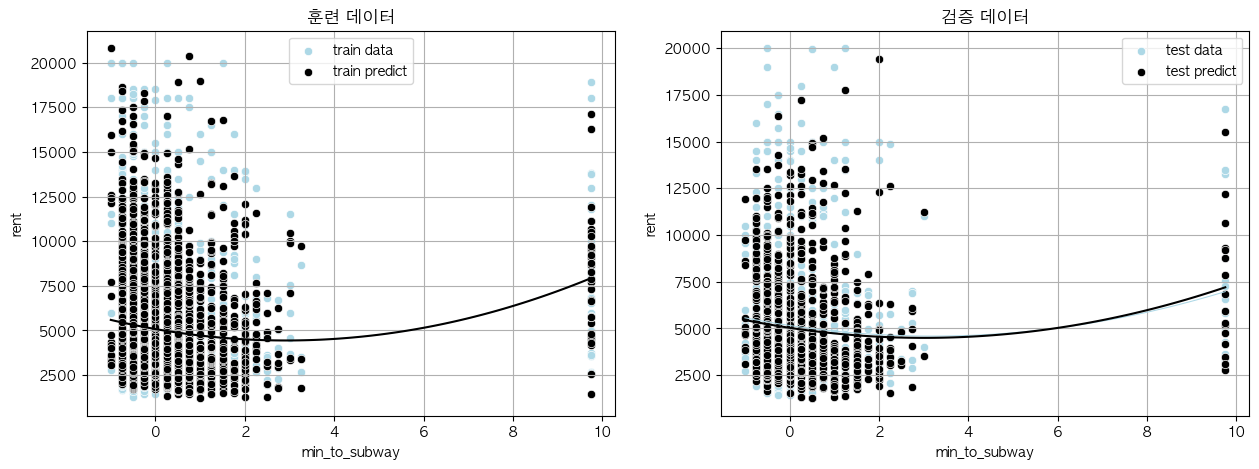

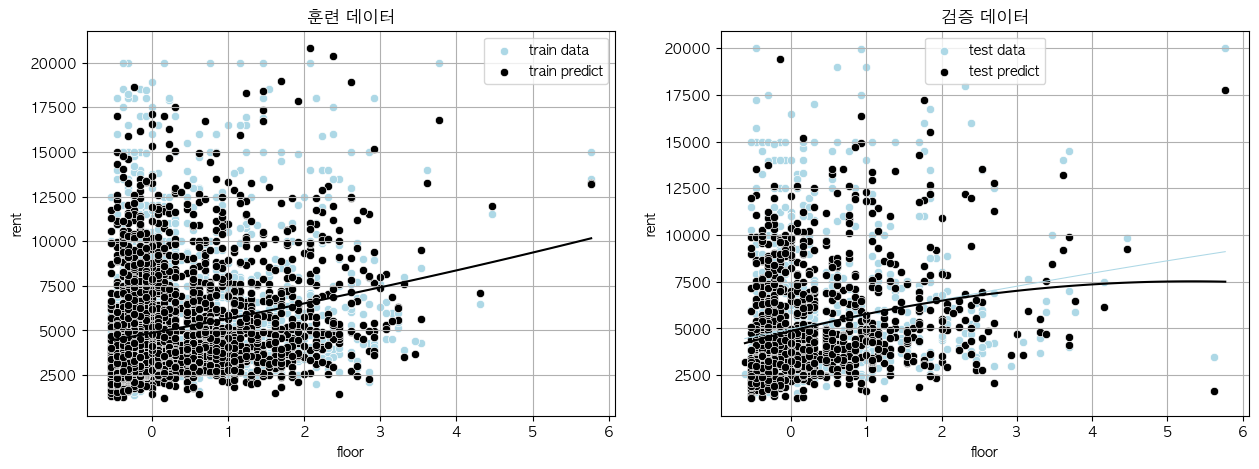

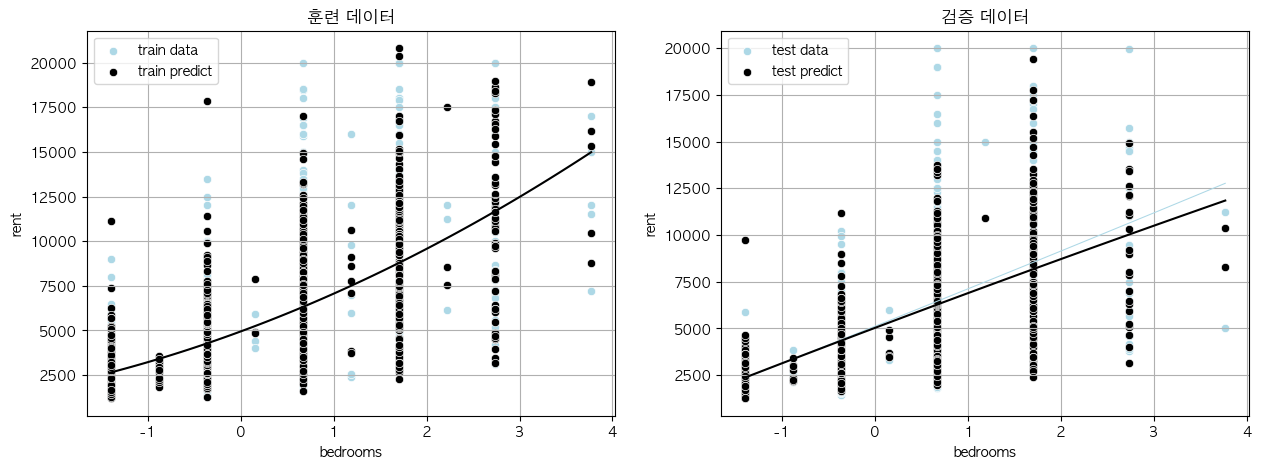

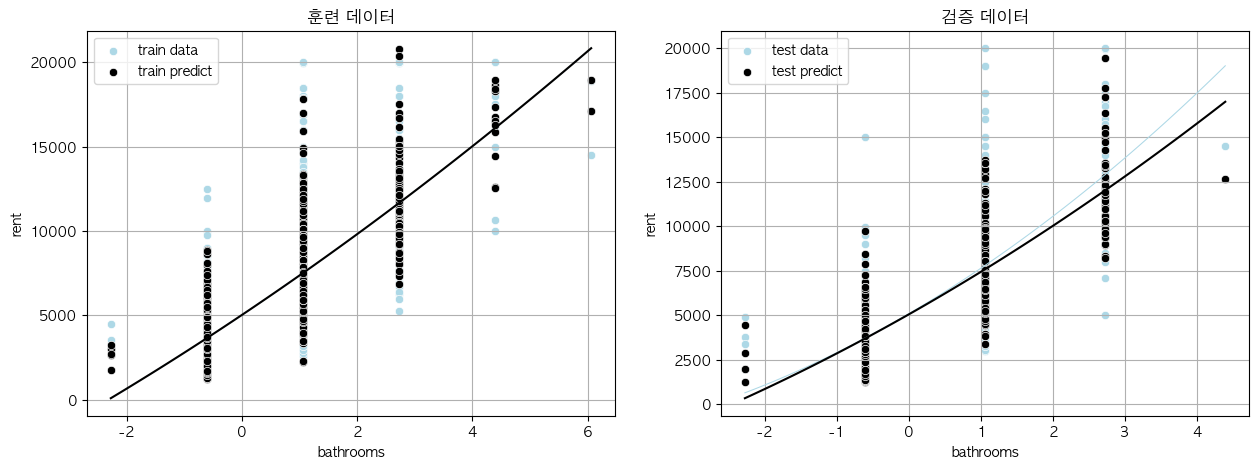

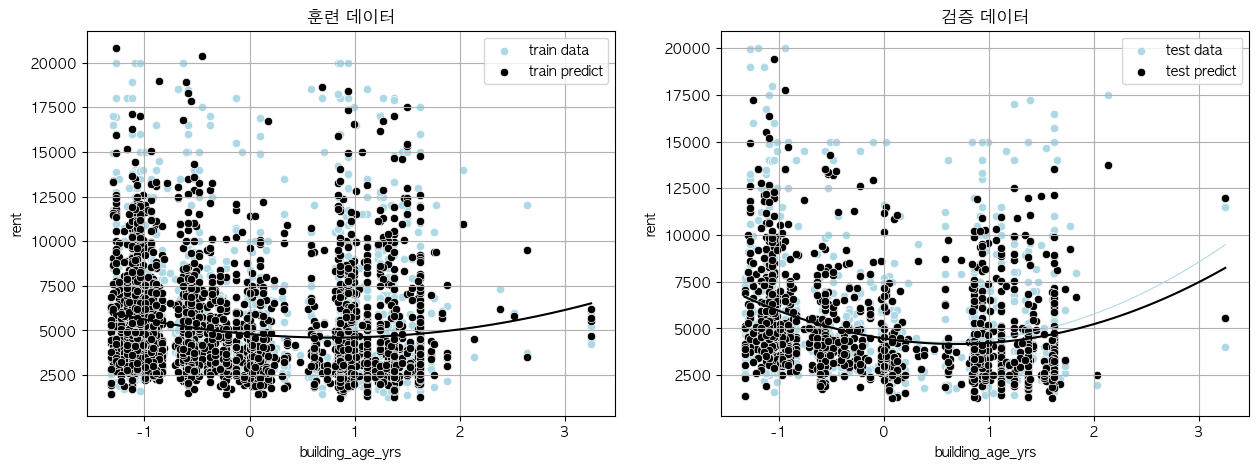

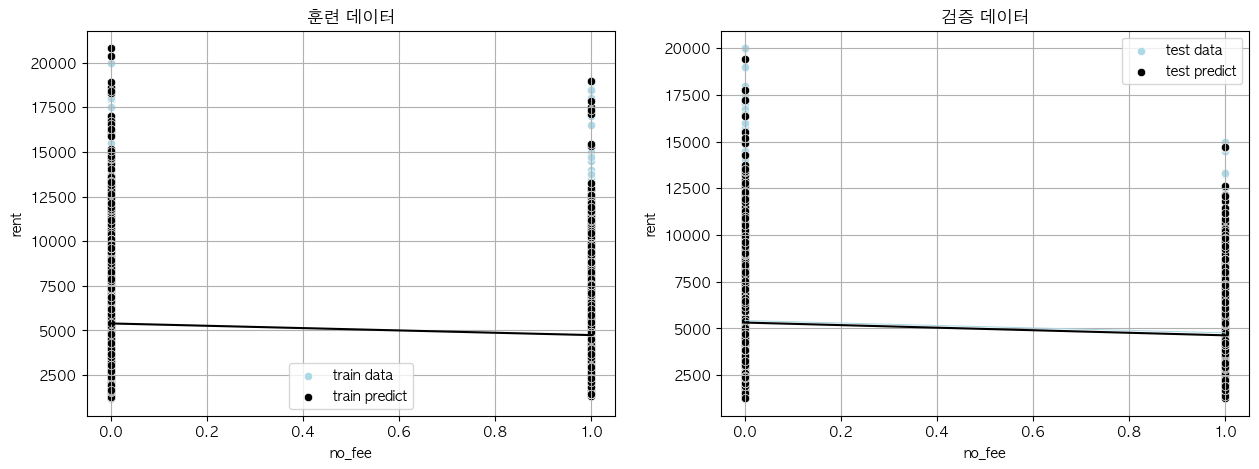

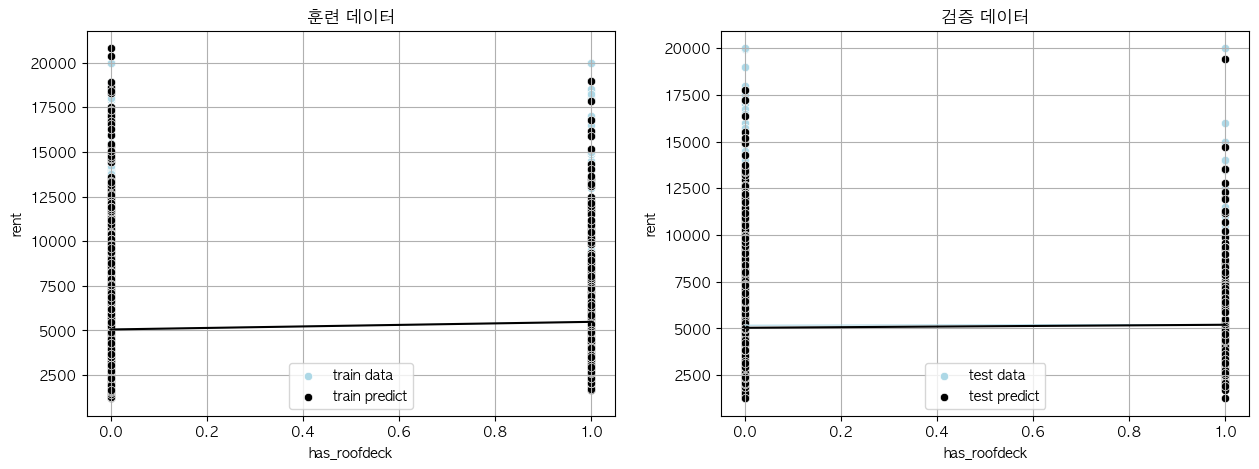

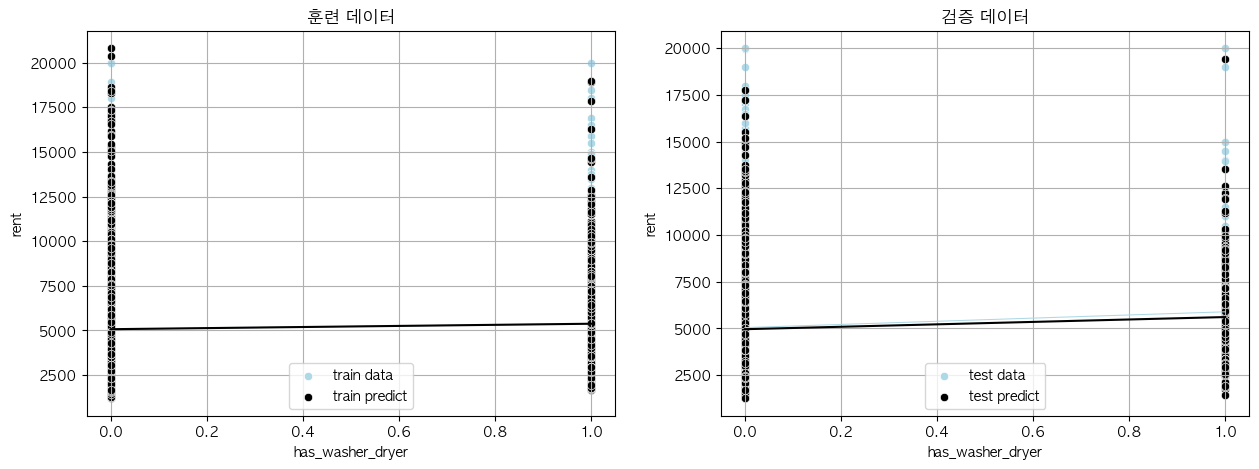

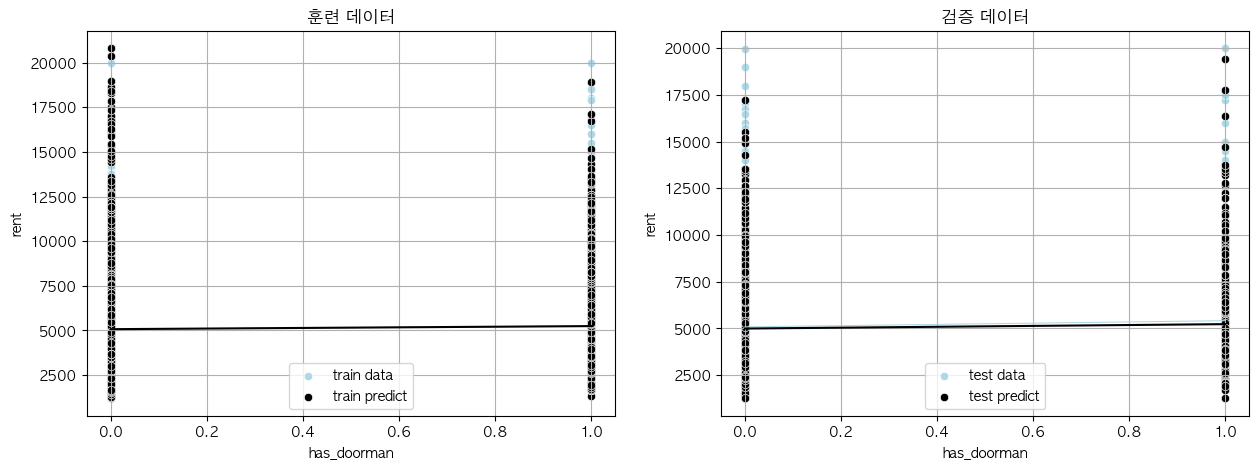

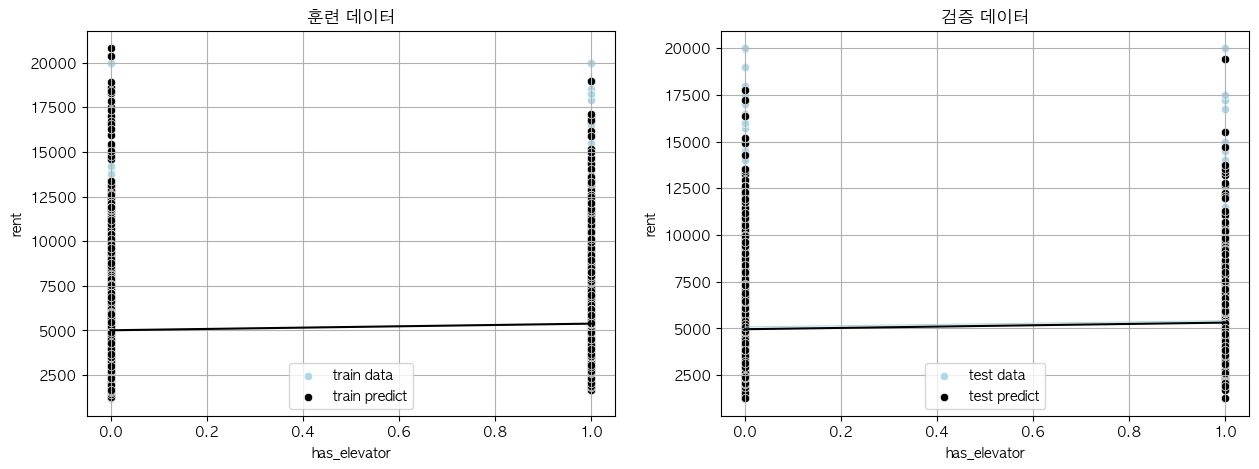

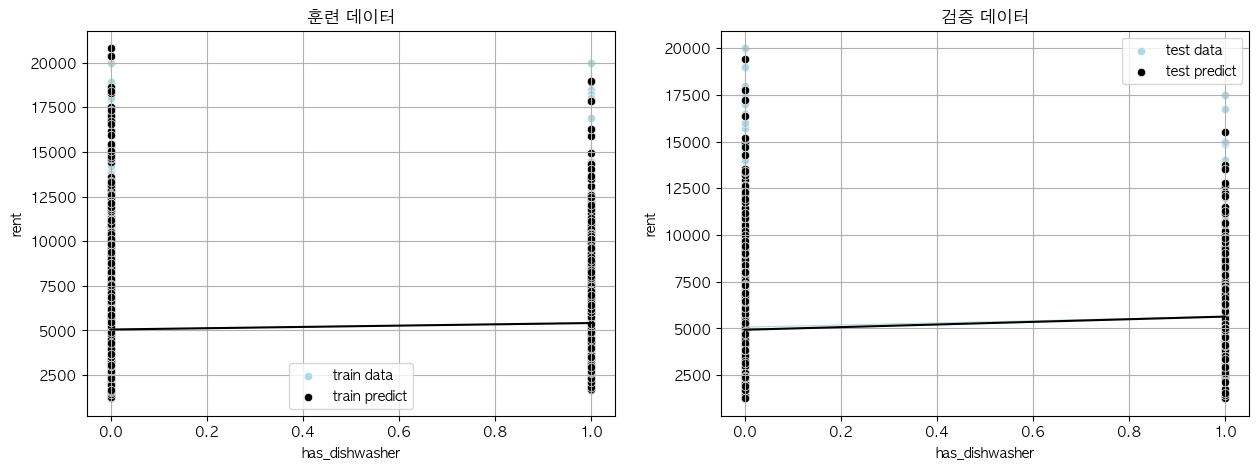

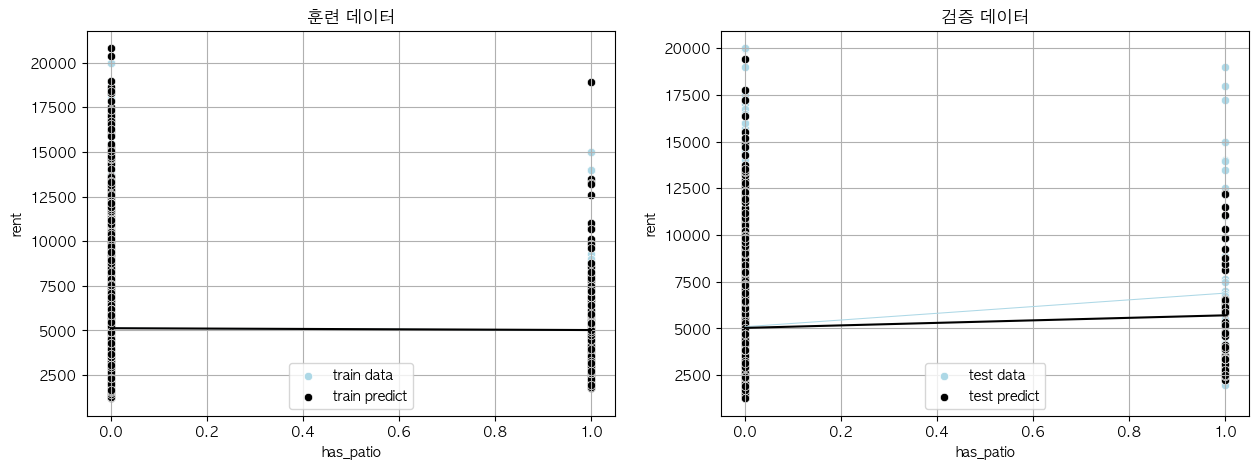

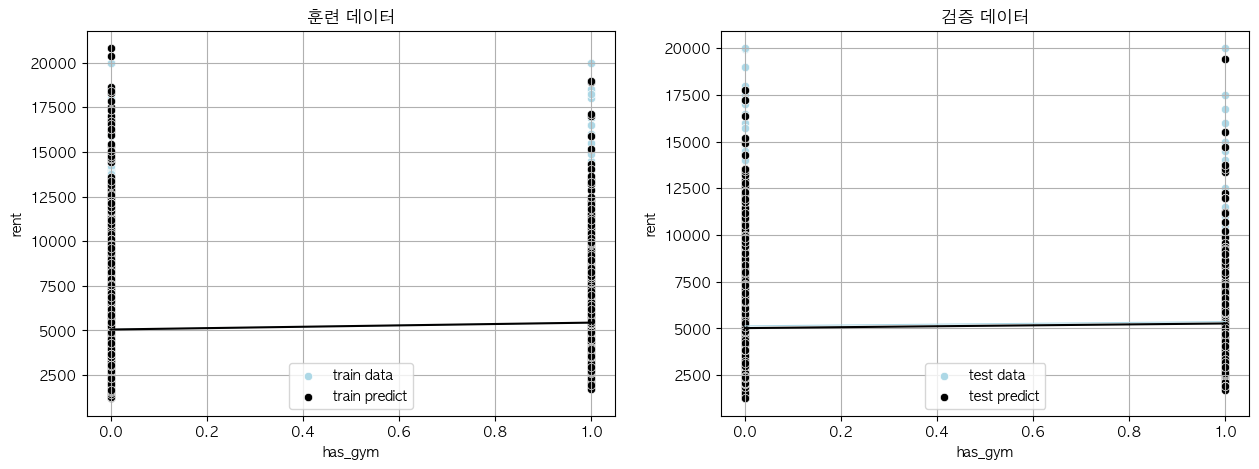

In [52]:
# 다항선형 회귀분석 수행

# 다항식으로 변환 시 더미 변수 제외
my_poly = PolynomialFeatures(degree = 2,
                             include_bias = False)
# 더미 제외 독립변수들만 추린 데이터프레임을 .fit_transform() 함수에 전달해서 학습을 시킴
my_fit = my_poly.fit_transform(origin5_ind_features_scaled.drop('index', axis='columns'))
# 출력되는 이름 확인
my_poly.get_feature_names_out()
# 2차항을 갖고 있는 데이터프레임 생성
x = DataFrame(my_fit, columns=my_poly.get_feature_names_out())
x
# 더미변수들과 병합
origin5_ind_features_preprocessed = merge(x.reset_index(),
                                          origin5_ind_features[dummies].reset_index(),
                                          how='outer')

# 훈련 데이터와 검증 데이터로 분리
x_train, x_test, y_train, y_test =  train_test_split(origin5_ind_features_preprocessed, origin5[['rent']], 
                                                     test_size = 0.3,
                                                     random_state = 777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# 회귀 분석 수행
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)
print('회귀 분석 수행 결과:')
print('\t계수: ', my_fit.coef_)
print('\t절편: ', my_fit.intercept_)
print('\t훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('\t검증 데이터 설명력: ', my_fit.score(x_test, y_test))

# 2차항을 갖고 있는 피처들의 회귀식 추정
expr_coefs = []
for i, v in enumerate(x.columns):
    expr_coefs.append('%f x %s' % (my_fit.coef_[0][i], v))
expr_coefs_added = ' + '.join(expr_coefs)
expr_final = 'y = ' + expr_coefs_added + ' + %f' % my_fit.intercept_[0]
print('\t회귀식 추정: ', expr_final)

# 예측값 생성 - 훈련데이터, 검증데이터
y_train_pred = my_fit.predict(x_train).reshape(-1)
y_test_pred = my_fit.predict(x_test).reshape(-1)

# 훈련데이터(ax1)와 검증데이터(ax2)에 대한 관측치와 예측치에 대한 시각화

# origin5_ind_features_scaled
for feature in origin5_ind_features_scaled.drop('index', axis='columns'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
    # 훈련 데이터 시각화
    sb.scatterplot(x = x_train[feature],
                y = y_train['rent'],
                label = 'train data',
                color = 'lightblue',
                ax = ax1)
    # 훈련 데이터 추세선
    coeff = np.polyfit(x_train[feature], y_train['rent'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
    Vtrand = np.linspace(x_train[feature].min(), x_train[feature].max(), 100) # 가상의 x 값
    Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
    sb.lineplot(x=Vtrand, y=Ttrand, color = 'lightblue', size = 10, ax=ax1, legend = False)

    # 훈련 데이터 예측값 시각화
    sb.scatterplot(x = x_train[feature],
                   y = y_train_pred,
                   label = 'train predict',
                   color = 'black',
                   ax = ax1)
    # 훈련 데이터 추정치 추세선
    # # x에 따라 y값이 변하는 2차 방정식 생성
    coeff = list(np.polyfit(x_train[feature], y_train_pred, 2))
    # # 평면좌표 상에서의 가상의 x값 생성
    Vtrand = np.linspace(x_train[feature].min(), x_train[feature].max(), 100)
    # # 생성된 x값에 따른 y값 생성
    Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2]
    sb.lineplot(x=Vtrand, y=Ttrand, color = 'black',  ax=ax1)
    ax1.set_title('훈련 데이터')
    ax1.legend()
    ax1.grid()

    # 검증 데이터 시각화
    sb.scatterplot(x=x_test[feature],
                   y=y_test['rent'],
                   label='test data',
                   color = 'lightblue',
                   ax = ax2)
    # 검증 데이터 추세선
    coeff = np.polyfit(x_test[feature], y_test['rent'], 2) # x에 따라 y값이 변하는 2차 방정식 생성
    Vtrand = np.linspace(x_test[feature].min(), x_test[feature].max(), 100) # 가상의 x 값
    Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2] # 가상의 x값에 대한 y값
    sb.lineplot(x=Vtrand, y=Ttrand, color = 'lightblue', size = 10, ax=ax2, legend=False)

    # 검증 데이터 예측값 시각화
    sb.scatterplot(x=x_test[feature],
                   y = y_test_pred,
                   label = 'test predict',
                   color = 'black',
                   ax = ax2)
    # 검증 데이터 추정치 추세선
    # # x에 따라 y값이 변하는 2차 방정식 생성
    coeff = list(np.polyfit(x_test[feature], y_test_pred, 2))
    # # 평면좌표 상에서의 가상의 x값 생성
    Vtrand = np.linspace(x_test[feature].min(), x_test[feature].max(), 100)
    # # 생성된 x값에 따른 y값 생성
    Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2]
    sb.lineplot(x=Vtrand, y=Ttrand, color = 'black',  ax=ax2)

    ax2.set_title('검증 데이터')
    ax2.legend()
    ax2.grid()

    plt.show()
    plt.close()


# 더미변수
for feature in origin5_ind_features[dummies]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
    # 훈련 데이터 시각화
    sb.scatterplot(x = x_train[feature],
                y = y_train['rent'],
                label = 'train data',
                color = 'lightblue',
                ax = ax1)
    # 훈련 데이터 추세선
    coeff = np.polyfit(x_train[feature], y_train['rent'], 1) # x에 따라 y값이 변하는 2차 방정식 생성
    Vtrand = np.linspace(x_train[feature].min(), x_train[feature].max(), 100) # 가상의 x 값
    Ttrand = coeff[0] * Vtrand + coeff[1] # 가상의 x값에 대한 y값
    sb.lineplot(x=Vtrand, y=Ttrand, color = 'lightblue', size = 10, ax=ax1, legend = False)

    # 훈련 데이터 예측값 시각화
    sb.scatterplot(x = x_train[feature],
                   y = y_train_pred,
                   label = 'train predict',
                   color = 'black',
                   ax = ax1)
    # 훈련 데이터 추정치 추세선
    # # x에 따라 y값이 변하는 2차 방정식 생성
    coeff = list(np.polyfit(x_train[feature], y_train_pred, 1))
    # # 평면좌표 상에서의 가상의 x값 생성
    Vtrand = np.linspace(x_train[feature].min(), x_train[feature].max(), 100)
    # # 생성된 x값에 따른 y값 생성
    Ttrand = coeff[0] * Vtrand + coeff[1]
    sb.lineplot(x=Vtrand, y=Ttrand, color = 'black',  ax=ax1)
    ax1.set_title('훈련 데이터')
    ax1.legend()
    ax1.grid()

    # 검증 데이터 시각화
    sb.scatterplot(x=x_test[feature],
                   y=y_test['rent'],
                   label='test data',
                   color = 'lightblue',
                   ax = ax2)
    # 검증 데이터 추세선
    coeff = np.polyfit(x_test[feature], y_test['rent'], 1) # x에 따라 y값이 변하는 2차 방정식 생성
    Vtrand = np.linspace(x_test[feature].min(), x_test[feature].max(), 100) # 가상의 x 값
    Ttrand = coeff[0] * Vtrand + coeff[1] # 가상의 x값에 대한 y값
    sb.lineplot(x=Vtrand, y=Ttrand, color = 'lightblue', size = 10, ax=ax2, legend=False)

    # 검증 데이터 예측값 시각화
    sb.scatterplot(x=x_test[feature],
                   y = y_test_pred,
                   label = 'test predict',
                   color = 'black',
                   ax = ax2)

    # 검증 데이터 추정치 추세선
    # # x에 따라 y값이 변하는 2차 방정식 생성
    coeff = list(np.polyfit(x_test[feature], y_test_pred, 1))
    # # 평면좌표 상에서의 가상의 x값 생성
    Vtrand = np.linspace(x_test[feature].min(), x_test[feature].max(), 100)
    # # 생성된 x값에 따른 y값 생성
    Ttrand = coeff[0] * Vtrand + coeff[1]
    sb.lineplot(x=Vtrand, y=Ttrand, color = 'black',  ax=ax2)

    ax2.set_title('검증 데이터')
    ax2.legend()
    ax2.grid()

    plt.show()
    plt.close()